In [8]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Exercise 1 - modelling height of !Kung people

task 1 - Prior predictive checks

In [9]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [10]:
model_ppc=CmdStanModel(stan_file=r"C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_1_ppc.stan")

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
model_1_fit=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
fit=model_1_fit.sample(data=dict(N=len(d), heights=d.height.values), seed=28052020)
mu_fit = fit.stan_variable('mu')
sigma_fit=fit.stan_variable('sigma')
height_pred=fit.stan_variable('height')

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


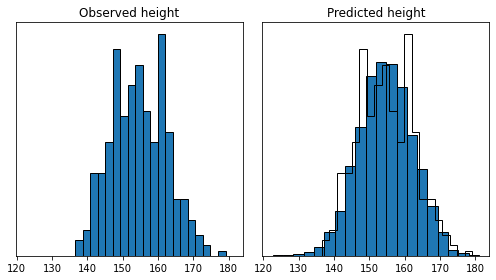

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4),sharex=True,sharey=True)
ax=axes[0]
ax.hist(d.height,bins=20,edgecolor='k',density=True)
ax.set_title('Observed height')
ax.set_yticks(())
ax2=axes[1]
ax2.hist(height_pred,bins=20,edgecolor='k',density=True)
ax2.hist(d.height,bins=20,histtype='step',color='black',density=True)
ax2.set_title('Predicted height')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

task 3

In [14]:
d["weight"].mean()
d.insert(3, "c_weight", (d["weight"]-d["weight"].mean()), True)
d.head()

,height,weight,age,c_weight,male
0,151.765,47.825606,63.0,2.835121,1
1,139.700,36.485807,63.0,-8.504679,0
2,136.525,31.864838,65.0,-13.125648,0
3,156.845,53.041914,41.0,8.051429,1
4,145.415,41.276872,51.0,-3.713614,0


In [15]:
model_ppc=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2a_pcc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


task 4

In [19]:
data4 = sim.draws_pd()


In [21]:
median =[]
for i in range(50):
    median.append(np.quantile(data4.iloc[:, i+5], 0.5))

C:\Users\Jaskier-PC\anaconda3\envs\Data_Anal\lib\site-packages\numpy\lib\function_base.py:3824: RuntimeWarning: Invalid value encountered in percentile
  r, k = _ureduce(a, func=_quantile_ureduce_func, q=q, axis=axis, out=out,
